# TASK 1. MNIST (Multi-Layer Perceptron)

### **We are going to train the MLP to classify the handwritten numbers with MNIST database. The overall procedure is following:**

> **1. Data preparation (data load and visualize)**  
**2. define the network architecture**  
**3. train the network**  
**4. test the trianed network**  

In [0]:
# import libraries

import torch 
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# 1. Data Preparation (data load and visualize) 

### **First, we have to download the MNIST database with torchvision library. Downloading may take a few seconds. After downloading, we should create DataLoaders for each of our datasets.**

In [0]:
# convert data to tensor
transform = transforms.ToTensor()

# training and test datasets
train = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# the number of samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True)

In [3]:
print('Training data Shape:', train.data.size())
print('Label Shape:', train.targets.size())

Training data Shape: torch.Size([60000, 28, 28])
Label Shape: torch.Size([60000])


### **After downloading, we have to make sure the data is loaded correctly. In this step, we will visualize a batch of our training data**

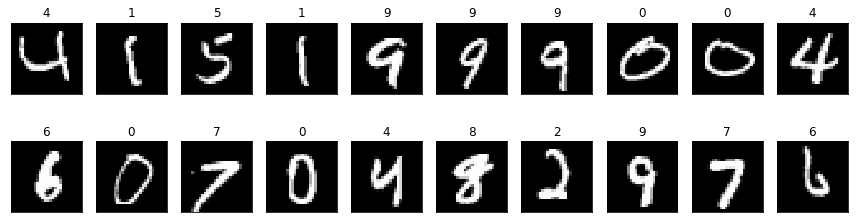

In [4]:
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(15, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

# 2. Define the network architecture 

### Now we will define our own network architecture. The network takes a 28x28 Tensor of pixel values for each image, and yields a 10-length tensor which indicates the class scores for an input image. We used cross-entropy loss which is highly recommended for classification.

![ ](https://)

![network architecture](https://postfiles.pstatic.net/MjAxOTA5MDVfMTU1/MDAxNTY3NjQ5NTg5NTM0.454atG_9g-bXEPiGZtmQTQiuNQNyPjIXolaj7RkqKB8g.16R5ChvV17phavFLgGBD1T9xq5jkjSZK2QiQM_Qt3d0g.PNG.susie1513/figure1.png?type=w580)
  

In [5]:
use_cuda = torch.cuda.is_available()
print(use_cuda)

True


In [6]:
class mnist_model(nn.Module):
    
    def __init__(self):
        super(mnist_model, self).__init__()       
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        
        # gpu setting
        if use_cuda:
            self.fc1 = self.fc1.cuda()
            self.fc2 = self.fc2.cuda()
            self.fc3 = self.fc3.cuda()
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x
    
model = mnist_model()
print(model)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

mnist_model(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


# 3. Train the network

### The steps for training are 



> **1. Clear the gradients of all variables**  
**2. Compute the predicted outputs by passing foward inputs to the model (forward pass)**  
**3. Calcuate the loss using the loss function that we defined**  
**4. Compute the gradient of the loss**  
**5. Perform a single optimization step**



In [7]:
import time

# number of epochs
nb_epochs = 30

# prepare the model to train
model.train()

tt1 = time.time();

for epoch in range(nb_epochs):
    # monitor training loss
    train_loss = 0.0
    iteration = 0
    
    for data, target in train_loader:
      
        if use_cuda:
            data = data.cuda()
            target = target.cuda()
            
        # 1. clear the gradients of all optimized variables
        optimizer.zero_grad()
        
        # 2. forward pass
        output = model(Variable(data))
        
        # 3. calculate the loss
        loss = criterion(output, target)
        
        # 4. backward pass
        loss.backward()
        
        # 5. parameter update
        optimizer.step()
        
        # update training loss
        train_loss += loss.item()
        iteration += 1
        
    # calculate average loss over one epoch
    train_loss = train_loss/iteration
    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
    
tt2 = time.time()-tt1       
print(tt2)

Epoch: 1 	Training Loss: 0.785425
Epoch: 2 	Training Loss: 0.299095
Epoch: 3 	Training Loss: 0.238849
Epoch: 4 	Training Loss: 0.196315
Epoch: 5 	Training Loss: 0.165044
Epoch: 6 	Training Loss: 0.141432
Epoch: 7 	Training Loss: 0.122832
Epoch: 8 	Training Loss: 0.107935
Epoch: 9 	Training Loss: 0.095939
Epoch: 10 	Training Loss: 0.085526
Epoch: 11 	Training Loss: 0.076777
Epoch: 12 	Training Loss: 0.069226
Epoch: 13 	Training Loss: 0.062690
Epoch: 14 	Training Loss: 0.056758
Epoch: 15 	Training Loss: 0.052101
Epoch: 16 	Training Loss: 0.047286
Epoch: 17 	Training Loss: 0.043179
Epoch: 18 	Training Loss: 0.039735
Epoch: 19 	Training Loss: 0.036420
Epoch: 20 	Training Loss: 0.033395
Epoch: 21 	Training Loss: 0.030697
Epoch: 22 	Training Loss: 0.028184
Epoch: 23 	Training Loss: 0.025952
Epoch: 24 	Training Loss: 0.023761
Epoch: 25 	Training Loss: 0.022038
Epoch: 26 	Training Loss: 0.020371
Epoch: 27 	Training Loss: 0.018640
Epoch: 28 	Training Loss: 0.017139
Epoch: 29 	Training Loss: 0.0

# 4. Test the trained network

### We test our model on unseen test data and evalaute the performance of our model. 

In [8]:
data = test.test_data.type_as(torch.FloatTensor())
target = test.test_labels

model.eval()

if use_cuda:
    data = data.cuda()
    target = target.cuda()
        
output = model(data)

pred = torch.max(output, 1)[1]

correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    
print('\nTest Accuracy : %2d %% (%2d/%2d)' 
      % (100 * torch.sum(correct) / len(data), torch.sum(correct), len(data)))


Test Accuracy : 97 % (9758/10000)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


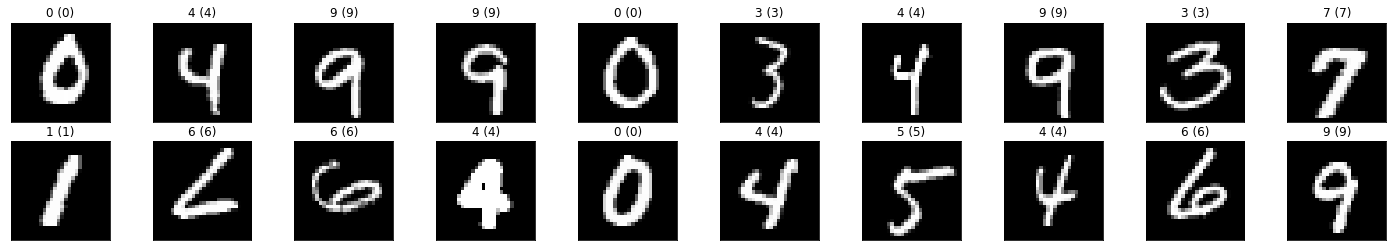

In [9]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

if use_cuda:
    images = images.cuda()
    labels = labels.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
preds = torch.max(output, 1)[1]
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())))